In [1]:
import pandas as pd

In [11]:
df = pd.read_csv('/Users/pauliuskomskis/Desktop/github/data/fatal-police-shootings-data.csv', index_col='id')

In [17]:
df.tail()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
id,,,,,,,,,,,,,
5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False
5927,TK TK,2020-06-16,shot,gun,27.0,M,NaN,Phoenix,AZ,False,attack,Not fleeing,False


In [13]:
pd.set_option('display.max_columns', 14)

In [15]:
df.isna().sum()

name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

### How many were shot that were armed with a gun?

In [39]:
filt_armed_gun = df['armed']=='gun'
df.loc[filt_armed_gun, 'race'].value_counts()

W    1451
B     762
H     447
N      41
A      35
O      19
Name: race, dtype: int64

- We can tell that White people were shot and killed in almost double the capacity as Black, and triple as Hispanic people were.

### Lets find out what race was the most violent by attacking the police, hence justified shooting.

In [35]:
filt_violent = (df['armed']=='gun') & (df['threat_level']=='attack')
df.loc[filt_violent, 'race'].value_counts()

W    1174
B     605
H     343
N      33
A      29
O      17
Name: race, dtype: int64

In [36]:

violent_counts = df.loc[filt_violent, 'race'].value_counts()

In [37]:
import matplotlib.pyplot as plt

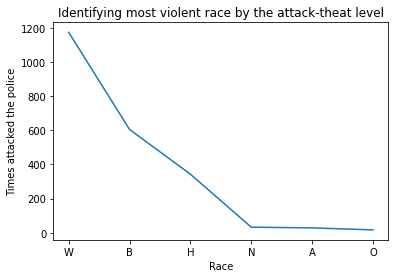

In [44]:
plt.plot(violent_counts)


#labels
plt.xlabel('Race')
plt.ylabel('Times attacked the police')
plt.title('Identifying most violent race by the attack-theat level')

plt.show()

#### Race that attacked and had a gun most are the White race, however in aggregate of the total 'attack' instances, the Black race overwelmingly had a higher percentage of the total

### Lets find out where most violent and gun related attacks occured:

In [59]:
df.loc[filt_violent, 'state'].value_counts()

CA    246
TX    232
FL    153
AZ    116
GA    100
NC     91
CO     91
MO     82
OK     80
OH     61
TN     60
AL     59
IL     55
NM     54
WA     54
LA     54
PA     53
SC     53
IN     52
NY     50
KY     49
VA     46
NV     45
MI     44
AR     40
OR     38
MS     36
WI     35
MD     31
WV     30
KS     26
AK     24
ID     23
MN     23
NJ     22
UT     20
IA     16
MT     13
MA     13
NE     11
HI     11
SD     11
ME     10
DC      7
CT      6
DE      6
WY      5
ND      4
NH      3
VT      3
RI      2
Name: state, dtype: int64

#### It seems that CA, TX, FL, AZ, and GA had the most violent attackers that got killed by police 

In [60]:
df.head(3)

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
id,,,,,,,,,,,,,
3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False


In [63]:
df.drop(columns=['name', 'date'], inplace=True)

In [64]:
df.head()

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
id,,,,,,,,,,,
3,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
4,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
5,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
8,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
9,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


#### How many people by race where shot that were not attacking the police

In [65]:
df['threat_level']

id
3       attack
4       attack
5        other
8       attack
9       attack
         ...  
5921     other
5922    attack
5924    attack
5926    attack
5927    attack
Name: threat_level, Length: 5416, dtype: object

In [70]:
filt_not_attack = (df['threat_level']=='other')
df.loc[filt_not_attack, 'race'].value_counts()

W    743
B    364
H    333
A     41
N     30
O     17
Name: race, dtype: int64

In [71]:
race_grp = df.groupby(['race'])
race_grp.get_group('W')

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
id,,,,,,,,,,,
4,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
8,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
11,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
15,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
16,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
...,...,...,...,...,...,...,...,...,...,...,...
5913,shot,gun,28.0,M,W,DeKalb County,TN,False,other,Other,False
5914,shot,gun,26.0,M,W,Paso Robles,CA,True,attack,Foot,False
5918,shot,unarmed,25.0,F,W,Sedalia,MO,False,other,Not fleeing,False


### The threat_level assesment for each race groups

In [79]:
race_grp['threat_level'].value_counts().loc['W']

threat_level
attack          1640
other            743
undetermined      93
Name: threat_level, dtype: int64

In [77]:
race_grp['threat_level'].value_counts().loc['B']

threat_level
attack          873
other           364
undetermined     61
Name: threat_level, dtype: int64

In [78]:
race_grp['threat_level'].value_counts().loc['H']

threat_level
attack          521
other           333
undetermined     48
Name: threat_level, dtype: int64

#### Same threat_level assesment but including lambda:

In [84]:
race_grp['threat_level'].apply(lambda x: x.str.contains('attack').sum())

race
A      51
B     873
H     521
N      44
O      31
W    1640
Name: threat_level, dtype: int64

In [109]:
df.dropna(axis='index', how='all', subset=['threat_level'])

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
id,,,,,,,,,,,
3,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
4,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
5,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
8,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
9,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...
5921,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5922,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5924,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False


In [110]:
race_group = race_grp['armed'].apply(lambda x: x.str.contains('gun').sum())


In [111]:
total_incidents = df['race'].value_counts()

In [119]:
attack = (df['threat_level']=='attack').value_counts()

In [122]:
concat = pd.concat([total_incidents, race_group,attack], axis='columns')
concat

,race,armed,threat_level
W,2476.0,1474.0,NaN
B,1298.0,776.0,NaN
H,902.0,461.0,NaN
A,93.0,38.0,NaN
N,78.0,41.0,NaN
O,48.0,20.0,NaN
True,NaN,NaN,3495.0
False,NaN,NaN,1921.0


In [123]:
df.head()

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
id,,,,,,,,,,,
3,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
4,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
5,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
8,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
9,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [129]:
age_filt = df['threat_level'] =='attack'
df.loc[age_filt, 'signs_of_mental_illness'].value_counts()

False    2745
True      750
Name: signs_of_mental_illness, dtype: int64